# Friedman's H Statistics of Interaction Strength

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import permutation_importance

from hstats import h_statistic

X, y = load_diabetes(return_X_y=True, as_frame=True)

est = HistGradientBoostingRegressor(max_iter=50, max_depth=4).fit(X, y)

# Get the top 4 most important features
m = 4
imp = permutation_importance(est, X, y, random_state=0)
top_m = X.columns[np.argsort(imp.importances_mean)[-m:]]

# Calculate H statistic for the top features
H = h_statistic(est, X=X, features=top_m, random_state=4)

H_df = pd.DataFrame(
    {
        "H2": H["h_squared_pairwise"].flatten(),
        "H_unnormalized": np.sqrt(H["numerator_pairwise"]).flatten(),
    },
    index=[str(pair) for pair in H["feature_pairs"]],
)
H_df

,H2,H_unnormalized
"('s3', 'bp')",0.002672,0.761117
"('s3', 'bmi')",0.008848,2.513469
"('s3', 's5')",0.005122,2.328607
"('bp', 'bmi')",0.031067,5.726417
"('bp', 's5')",0.016432,4.669894
"('bmi', 's5')",0.020139,6.421637


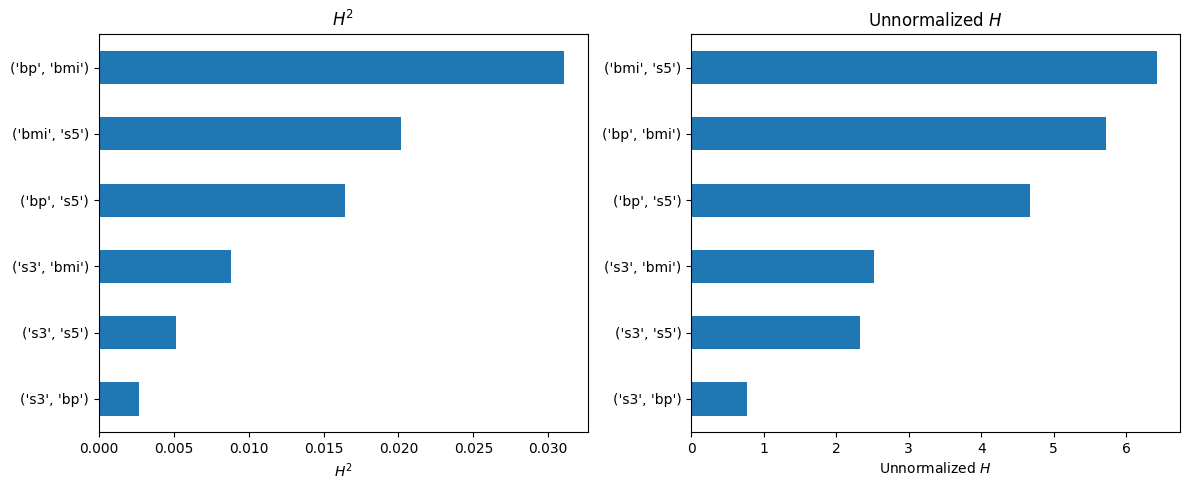

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for col, title, ax in zip(H_df.columns, ("$H^2$", "Unnormalized $H$"), axes):
    H_df[col].sort_values().plot.barh(ax=ax, title=f"{title}", xlabel=f"{title}")
plt.tight_layout()


The interactions are weak: The strongest one explains only 3% of the combined effect of the two features.

To visualize the strongest interaction effects, we could use 2D partial dependence plots.